# 1- Harris corner detection ,Chessboard

# import resource and display image

In [1]:
import numpy as np 
import cv2 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
# plt.rcParams['interactive']==True 
# %matplotlib qt
%matplotlib inline

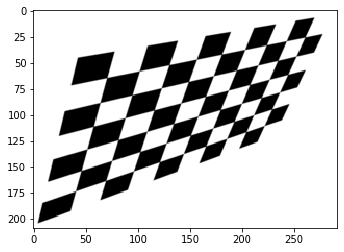

In [12]:
img = cv2.imread('E:/Computer-Vision-Nanodegree-master/lesson 4/chessboard.png')
img_copy = np.copy(img)
img_copy = cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)
plt.imshow(img_copy)

# Detect corner

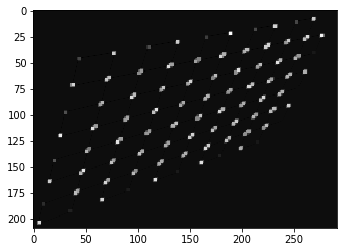

In [28]:
# Convert to grayscale
gray = cv2.cvtColor(img_copy,cv2.COLOR_RGB2GRAY)

# Convert to float type 
gray = np.float32(gray)

# Detect corner by harris
dst = cv2.cornerHarris(gray , 2 , 3 , 0.04)  # 2 square , 3 kernal size , 0.04 the color background

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)
plt.imshow(dst,cmap='gray')

# Select and display strong corner 

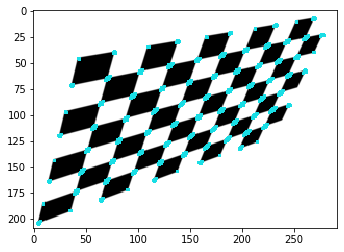

In [56]:
# Define trehold to extract strong corners 
# This value may be depending on the image 

thresh = 0.01 * dst.max()

# Create corner image to drow corner 
corner_img = np.copy(img_copy)

# Iterate through all the corners and drow the in the image ( if they pass from threshold)
for j in range(0,dst.shape[0]):
    for i in range(0,dst.shape[1]):
        if( dst[j,i] > thresh ):
            # image ,center pt , radius , color , thickness
            cv2.circle(corner_img,(i,j),0,(25,222,229),0)

plt.imshow(corner_img)            

# 2- Image contours 


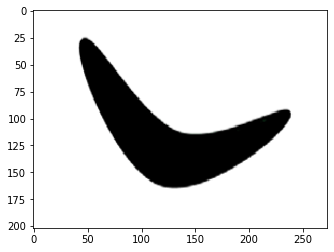

In [103]:
# Read image
hand = cv2.imread('E:/Computer-Vision-Nanodegree-master/lesson 4/6.png')

# Make copy of the image 
hand_copy = np.copy(hand)

# Change color 
hand_copy = cv2.cvtColor(hand_copy,cv2.COLOR_BGR2RGB)

plt.imshow(hand_copy)

# Produce binary image for finding contours

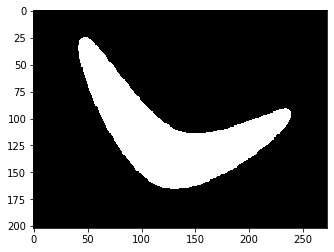

In [104]:
# Convert to grayscale 
gray= cv2.cvtColor(hand_copy,cv2.COLOR_RGB2GRAY)

# Create binary threshold 
retval , binray = cv2.threshold(gray , 225,250,cv2.THRESH_BINARY_INV)

plt.imshow(binray,cmap='gray')

# Find and draw the contours

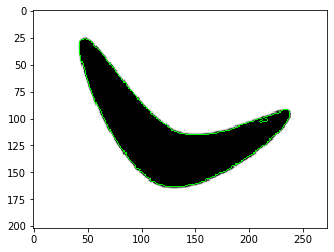

In [105]:
# Find contours from threshold image 
reteval , contours , hirearchy = cv2.findContours(gray , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)

# Draw contours 
hand_copy2 = np.copy(hand_copy)
all_contours = cv2.drawContours(hand_copy,contours,1,(0,250,0),1)

plt.imshow(all_contours)

# 3- K-means Clustring

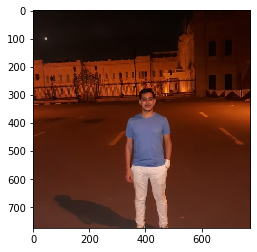

In [2]:
# Read image
abdo = cv2.imread('E:/Computer-Vision-Nanodegree-master/lesson 4/2.jpg')

# Make copy
abdo_copy = np.copy(abdo)

# Change color to RGB 
abdo_copy = cv2.cvtColor(abdo_copy,cv2.COLOR_BGR2RGB)

plt.imshow(abdo_copy)

# Perepar data for K-means

In [3]:
# Reshape image into 2D array of pixel and 3 color values (RGB)
pixel_vals = abdo_copy.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

# Implement K-means clustring

[[ 74.973564  29.169975  13.385994]
 [157.42229  116.84507  114.19372 ]]


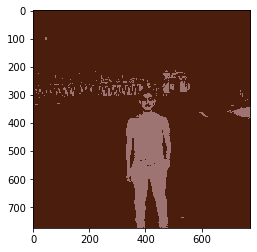

In [18]:
# Define stopping criteria 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER ,10 ,0.1)

# Perform k-means clustring 
k = 2
retval , label , center = cv2.kmeans(pixel_vals , k , None , criteria , 10 , cv2.KMEANS_RANDOM_CENTERS) 
# None >> any label you need  , 10 number of temps , center >> center points   

print(center)

# Convert data to 8-uint , 8-bit values 
center = np.uint8(center)
segmented_data = center[label.flatten()]
# print('after')
# print(center)
# print('segmente_data',segmented_data)
# print(abdo_copy.shape)

# Reshape daa into the original image dimension 
segmented_image = segmented_data.reshape(775,774,3)
labels_reshape = label.reshape(775,774)

plt.imshow(segmented_image)

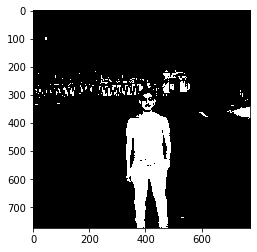

In [19]:
# Visualize one segment 
plt.imshow(labels_reshape==1 , cmap='gray')

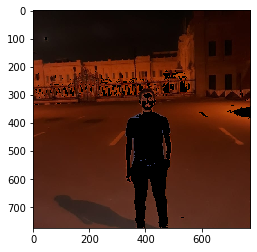

In [20]:
# Mask image segment 
masked_image = np.copy(abdo_copy)

masked_image[labels_reshape==1]=[0,0,0]

plt.imshow(masked_image)